In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing



In [23]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import matplotlib
#matplotlib.use("TkAgg")
#from utils import preprocess
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

df = pd.read_csv('/content/drive/MyDrive/Projects/Project 9 : Heart Disease prediction/heart_disease_data.csv')

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
X = df.iloc[:,:13].values
y = df["target"].values

In [29]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 )

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [32]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100,verbose=False )

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 15ms/step


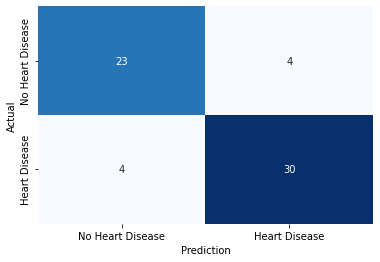

<Figure size 432x288 with 0 Axes>

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm
ax = sns.heatmap(cm, annot=True, xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [35]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

86.88524590163934


In [36]:
scores = classifier.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = classifier.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 89.67%

Testing Accuracy: 86.89%



2/2 [==============================] - 0s 6ms/step


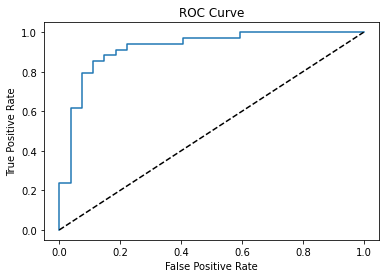

<Figure size 432x288 with 0 Axes>

In [37]:
from tensorflow import keras
#from keras import Model
y_test_pred_probs = classifier.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()